****************************************************************************************************************
ORIGINAL - imgs/car_wash.png


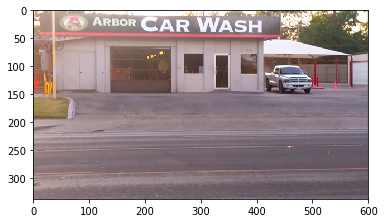

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.000990 seconds i prondađeno je 3 okvira
imgs/car_wash.png - Felzenszwalb


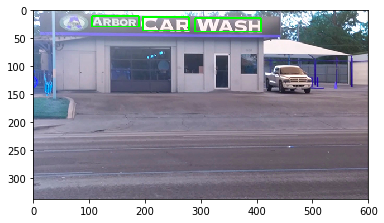

[INFO] Trajanje izvođenja Fast metode:  0.000993 seconds i prondađeno je 3 okvira
imgs/car_wash.png - Fast


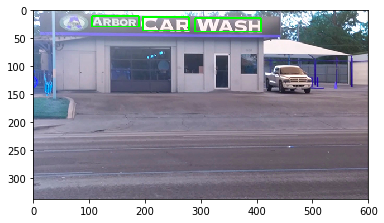

[INFO] Trajanje izvođenja Malisiewicz metode:  0.001509 seconds i prondađeno je 3 okvira
imgs/car_wash.png - Malisiewicz


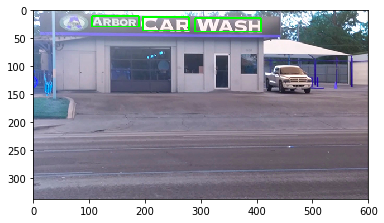

****************************************************************************************************************
ORIGINAL - imgs/lebron_james.jpg


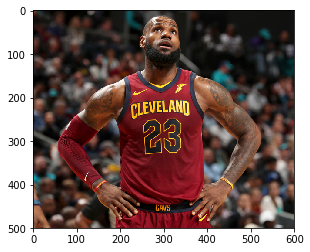

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.000494 seconds i prondađeno je 3 okvira
imgs/lebron_james.jpg - Felzenszwalb


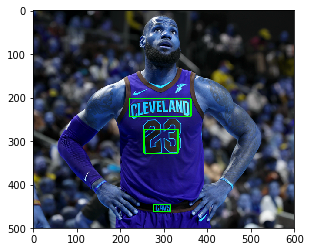

[INFO] Trajanje izvođenja Fast metode:  0.000499 seconds i prondađeno je 3 okvira
imgs/lebron_james.jpg - Fast


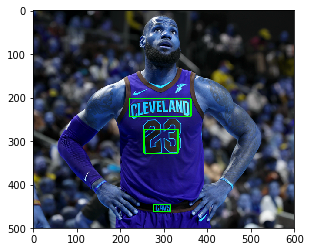

[INFO] Trajanje izvođenja Malisiewicz metode:  0.000988 seconds i prondađeno je 3 okvira
imgs/lebron_james.jpg - Malisiewicz


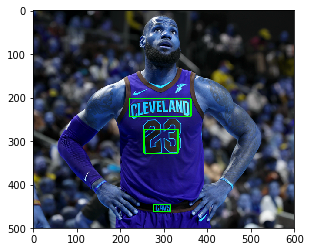

****************************************************************************************************************
ORIGINAL - imgs/license.jpg


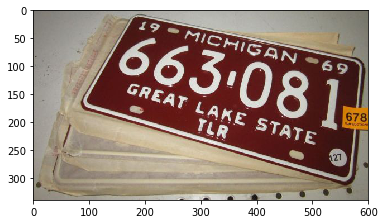

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.001984 seconds i prondađeno je 10 okvira
imgs/license.jpg - Felzenszwalb


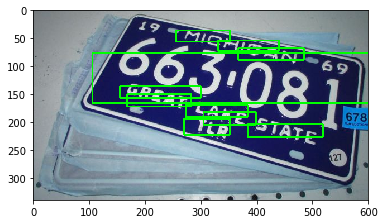

[INFO] Trajanje izvođenja Fast metode:  0.003473 seconds i prondađeno je 10 okvira
imgs/license.jpg - Fast


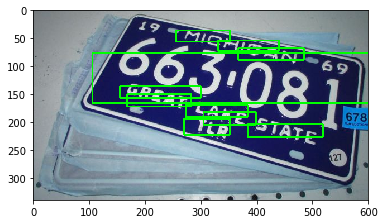

[INFO] Trajanje izvođenja Malisiewicz metode:  0.003474 seconds i prondađeno je 10 okvira
imgs/license.jpg - Malisiewicz


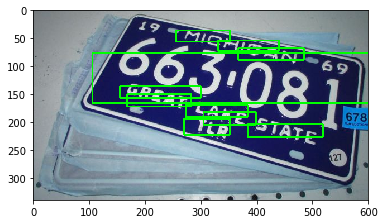

****************************************************************************************************************
ORIGINAL - imgs/manuals.jpg


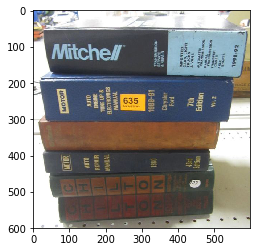

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.000496 seconds i prondađeno je 2 okvira
imgs/manuals.jpg - Felzenszwalb


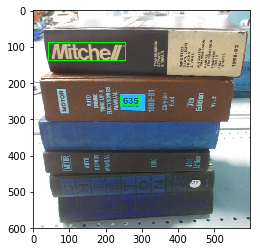

[INFO] Trajanje izvođenja Fast metode:  0.001489 seconds i prondađeno je 2 okvira
imgs/manuals.jpg - Fast


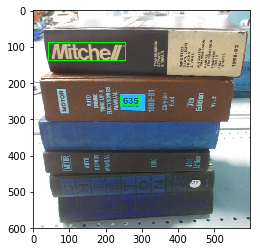

[INFO] Trajanje izvođenja Malisiewicz metode:  0.000966 seconds i prondađeno je 2 okvira
imgs/manuals.jpg - Malisiewicz


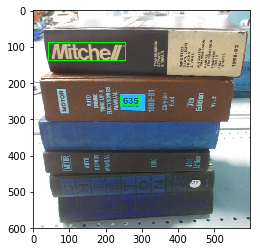

****************************************************************************************************************
ORIGINAL - imgs/mercury.jpg


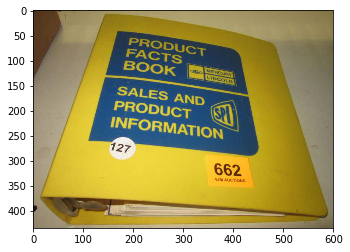

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.001488 seconds i prondađeno je 10 okvira
imgs/mercury.jpg - Felzenszwalb


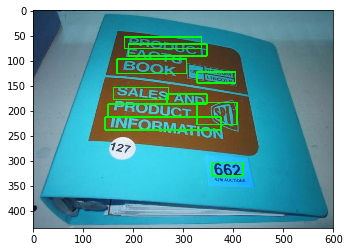

[INFO] Trajanje izvođenja Fast metode:  0.003461 seconds i prondađeno je 10 okvira
imgs/mercury.jpg - Fast


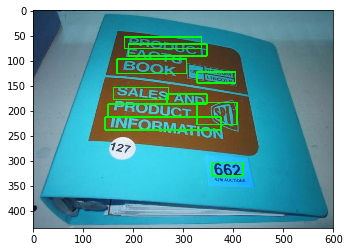

[INFO] Trajanje izvođenja Malisiewicz metode:  0.001984 seconds i prondađeno je 10 okvira
imgs/mercury.jpg - Malisiewicz


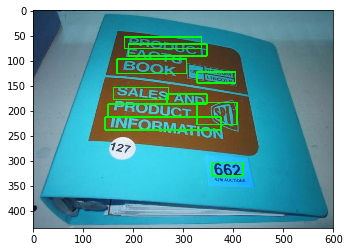

****************************************************************************************************************
ORIGINAL - imgs/sign.jpg


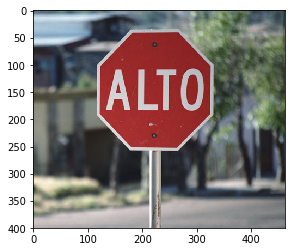

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.000497 seconds i prondađeno je 1 okvira
imgs/sign.jpg - Felzenszwalb


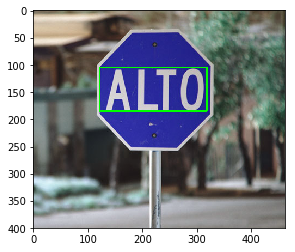

[INFO] Trajanje izvođenja Fast metode:  0.001488 seconds i prondađeno je 1 okvira
imgs/sign.jpg - Fast


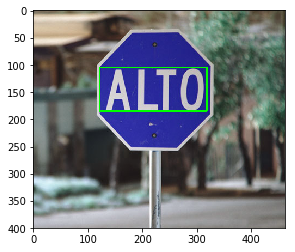

[INFO] Trajanje izvođenja Malisiewicz metode:  0.000496 seconds i prondađeno je 1 okvira
imgs/sign.jpg - Malisiewicz


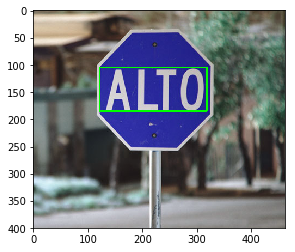

****************************************************************************************************************
ORIGINAL - imgs/sign_r-10.jpg


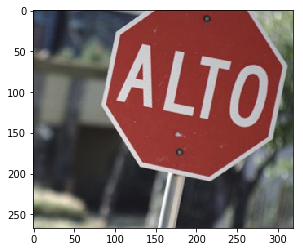

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.001487 seconds i prondađeno je 1 okvira
imgs/sign_r-10.jpg - Felzenszwalb


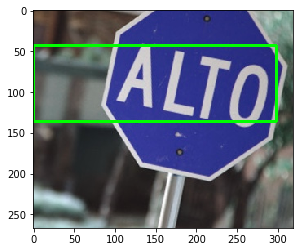

[INFO] Trajanje izvođenja Fast metode:  0.000991 seconds i prondađeno je 1 okvira
imgs/sign_r-10.jpg - Fast


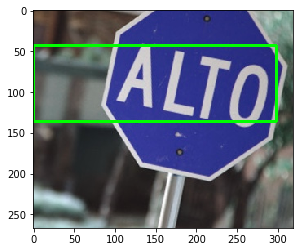

[INFO] Trajanje izvođenja Malisiewicz metode:  0.001486 seconds i prondađeno je 1 okvira
imgs/sign_r-10.jpg - Malisiewicz


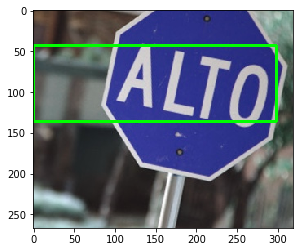

****************************************************************************************************************
ORIGINAL - imgs/sign_r10.jpg


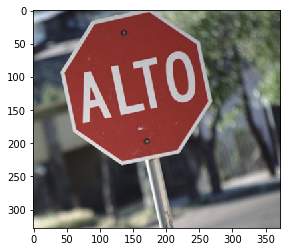

[INFO] Učitavanje EAST text detektora...
[INFO] Trajanje izvođenja Felzenszwalb metode:  0.000992 seconds i prondađeno je 1 okvira
imgs/sign_r10.jpg - Felzenszwalb


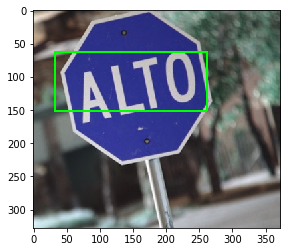

[INFO] Trajanje izvođenja Fast metode:  0.000991 seconds i prondađeno je 1 okvira
imgs/sign_r10.jpg - Fast


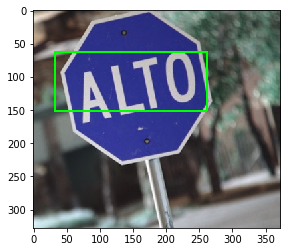

[INFO] Trajanje izvođenja Malisiewicz metode:  0.000991 seconds i prondađeno je 1 okvira
imgs/sign_r10.jpg - Malisiewicz


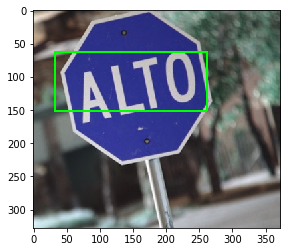

In [17]:
import argparse
import os
import time

import cv2
from nms import nms
import numpy as np

import utils
from decode import decode
from draw import drawPolygons, drawBoxes

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


def show_img_original(filename):
    image = mpimg.imread(filename)
    print("ORIGINAL - " + str(filename))
    plt.imshow(image)
    plt.show()
    
def show_img(title, img):
    print(title)
    plt.imshow(img)
    plt.show()
    

def text_detection(image_filename, east, min_confidence, width, height):
    image = cv2.imread(image_filename)
    orig = image.copy()
    (origHeight, origWidth) = image.shape[:2]

    (newW, newH) = (width, height)
    ratioWidth = origWidth / float(newW)
    ratioHeight = origHeight / float(newH)

    image = cv2.resize(image, (newW, newH))
    (imageHeight, imageWidth) = image.shape[:2]

    layerNames = [
        "feature_fusion/Conv_7/Sigmoid",
        "feature_fusion/concat_3"
        ]

    show_img_original(image_filename)
    
    print("[INFO] Učitavanje EAST text detektora...")
    net = cv2.dnn.readNet(east)

    blob = cv2.dnn.blobFromImage(image, 1.0, (imageWidth, imageHeight), (123.68, 116.78, 103.94), swapRB=True, crop=False)

    start = time.time()
    net.setInput(blob)
    (scores, geometry) = net.forward(layerNames)
    end = time.time()

    #print("[INFO] Trajanje detekcije: {:.6f} sekundi".format(end - start))


    confidenceThreshold = min_confidence
    nmsThreshold = 0.4

    (rects, confidences, baggage) = decode(scores, geometry, confidenceThreshold)

    offsets = []
    thetas = []
    for b in baggage:
        offsets.append(b['offset'])
        thetas.append(b['angle'])


    functions = [nms.felzenszwalb.nms, nms.fast.nms, nms.malisiewicz.nms]

    for i, function in enumerate(functions):

        start = time.time()
        indicies = nms.boxes(rects, confidences, nms_function=function, confidence_threshold=confidenceThreshold,
                                 nsm_threshold=nmsThreshold)
        end = time.time()

        indicies = np.array(indicies).reshape(-1)

        drawrects = np.array(rects)[indicies]

        name = function.__module__.split('.')[-1].title()
        print("[INFO] Trajanje izvođenja {} metode:  {:.6f} seconds i prondađeno je {} okvira".format(name, end - start, len(drawrects)))

        drawOn = orig.copy()
        #drawOn = mpimg.imread(image_filename)
        drawBoxes(drawOn, drawrects, ratioWidth, ratioHeight, (0, 255, 0), 2)

        title = "{} - {}".format(image_filename, name)
        show_img(title, drawOn)

def text_detection_command():
    imgs_path      = "imgs"
    east           = os.path.join(os.path.dirname(os.path.realpath("__file__")), 'frozen_east_text_detection.pb')
    min_confidence = 0.5
    width          = 320
    height         = 320

    i = 1
    for filename in os.listdir(imgs_path):
        print("****************************************************************************************************************")
        print(str(i) + ".")
        text_detection(imgs_path + "/" + filename, east, min_confidence, width, height)
        i = i + 1



if __name__ == '__main__':
    text_detection_command()
